https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-classifier

Packages

In [85]:
import numpy as np  # linear algebra
import pandas as pd  # data processing

from sklearn.tree import DecisionTreeClassifier  # model

from matplotlib import pyplot as plt  # visualization
from sklearn.tree import plot_tree  # visualize tree

Dataset

In [86]:
def preprocess(df):
    # df['Female'] = (df['Sex'] == 'female').astype('int64')
    # df['FirstClass'] = (df['Pclass'] == 1).astype('int64')
    # Putting on index to each dataset before split it
    df = df.set_index("PassengerId")
    # Sex
    change = {'female':1,'male':0}
    df.Sex = df.Sex.map(change)

    # Embarked
    change = {'S':0,'C':1,'Q':2}
    df.Embarked = df.Embarked.map(change)
    df['Embarked'] = df['Embarked'].replace(to_replace = np.nan, value =1)

    # df['Age'] = df['Age'].groupby(df['Age'].isnull()).mean()
    df['Age'] = df['Age'].replace(to_replace = np.nan, value =df['Age'].mean())
    # df['Age'] = df['Age'].replace(to_replace = np.nan, value =50)
    df = df.drop(columns=['Name','Ticket','Cabin'])
    return df

In [87]:
df = pd.read_csv('/content/sample_data/train.csv')
df = preprocess(df)

In [88]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [89]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.000000,1,0,7.2500,0.0
2,1,1,1,38.000000,1,0,71.2833,1.0
3,1,3,1,26.000000,0,0,7.9250,0.0
4,1,1,1,35.000000,1,0,53.1000,0.0
5,0,3,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
887,0,2,0,27.000000,0,0,13.0000,0.0
888,1,1,1,19.000000,0,0,30.0000,0.0
889,0,3,1,29.699118,1,2,23.4500,0.0


In [90]:
# defining our tree object with the hyper parameters discussed above
model = DecisionTreeClassifier(
    splitter='best',
    min_samples_split=3,
    max_depth= 5,
)


model.fit(
    X=df.drop(columns=['Survived']), 
    y=df['Survived']
)

DecisionTreeClassifier(max_depth=5, min_samples_split=3)

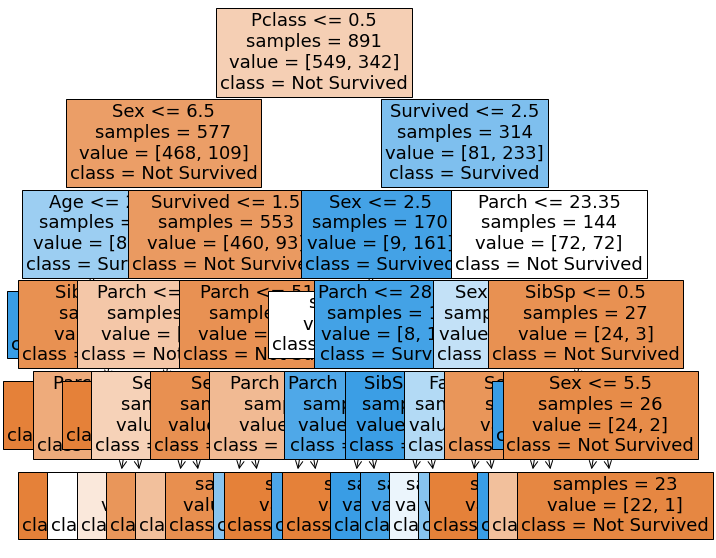

In [91]:
plt.figure(figsize=(10, 10))
plot_tree(
    model,
    feature_names=['Survived',	'Pclass',	'Sex',	'Age',	'SibSp',	'Parch',	'Fare',	'Embarked'],  
    class_names=['Not Survived', 'Survived'],
    impurity=False,
    filled=True,
    fontsize=18
)
plt.show()

In [92]:
# 892
inputs = pd.DataFrame([{'Pclass':3,	'Sex':0,	'Age':34.5,	'SibSp':0,	'Parch':0,	'Fare':7.8292,'Embarked':2}])
prediction = model.predict(
    inputs
)
print(f"Survived: {bool(prediction[0])}")

Survived: False


https://www.kaggle.com/code/zlatankr/titanic-random-forest-82-78

In [93]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
# rf.fit(df.iloc[:, 1:], df.iloc[:, 0])
model_rf.fit(
    X=df.drop(columns=['Survived']), 
    y=df['Survived']
)
print("%.4f" % model_rf.oob_score_)

0.8305


In [95]:
# 892
inputs = pd.DataFrame([{'Pclass':3,	'Sex':0,	'Age':34.5,	'SibSp':0,	'Parch':0,	'Fare':7.8292,'Embarked':2}])
prediction = model_rf.predict(
    inputs
)
print(f"Survived: {bool(prediction[0])}")

Survived: False


Extremely Randomized Trees

In [97]:
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTreesClassifier = ExtraTreesClassifier()
# rf.fit(df.iloc[:, 1:], df.iloc[:, 0])
model_ExtraTreesClassifier.fit(
    X=df.drop(columns=['Survived']), 
    y=df['Survived']
)

ExtraTreesClassifier()

In [98]:
# 892
inputs = pd.DataFrame([{'Pclass':3,	'Sex':0,	'Age':34.5,	'SibSp':0,	'Parch':0,	'Fare':7.8292,'Embarked':2}])
prediction = model_ExtraTreesClassifier.predict(
    inputs
)
print(f"Survived: {bool(prediction[0])}")

Survived: False
